# Image recognition with a MLP classifier

Image recognition is a classic application of machine learning algorithms. We will look at a typical example: recognizing handwritten digits. 

This has another new component: Most our previous examples had only 2 target classes. Here we have 10, the digits "0", "1", "2",....,"9". This is a subset of a max larger dataset of handwritten digits we will use again later.

We have a total of 1797 image samples


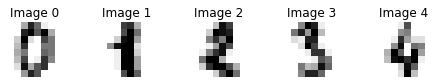

In [1]:
# import standard stuff
import matplotlib.pyplot as plt
import numpy as np

# Import train_test_split function
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Import scikit-learn MLP classifier
from sklearn.neural_network import MLPClassifier 

#Import datasets so we can access the "digits" dataset
from sklearn import datasets

#import the digits dataset
digits = datasets.load_digits()

print(f"We have a total of {len(digits.images)} image samples")

#look at the first 5 images
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 1))
for i in range(5):
    ax = axes[i]
    ax.set_axis_off()
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
    title = "Image " + str(digits.target[i])
    ax.set_title(title)

Before we can input the data into a classifier we need to "flatten" it, as the classifier expects a linear list of features, but the images are 2D structures

In [2]:
# flatten the 8x8 images into 64 features
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print("data[0] = ",data[0])
print("Number of features is",len(data[0]))

data[0] =  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Number of features is 64


In [3]:
# Create an MLP classifier
clf = MLPClassifier(solver='adam', hidden_layer_sizes=(20), max_iter=10000)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle = True)

# Train the classifier on the training images
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=20, max_iter=10000)

In [4]:
# How well does the classifier do on the training images?
y_pred = clf.predict(X_train)

# Check model accuracy, how often is the classifier correct?
print(f"Accuracy on training set is {metrics.accuracy_score(y_train, y_pred):.3}")

Accuracy on training set is 1.0


In [5]:
# How well does the classifier do on the test images?
y_pred = clf.predict(X_test)

# Check model accuracy, how often is the classifier correct?
print(f"Accuracy on test set is {metrics.accuracy_score(y_test, y_pred):.3}")

Accuracy on test set is 0.944


We can see which digits are most often mistaken (and for what) using the confusion matrix

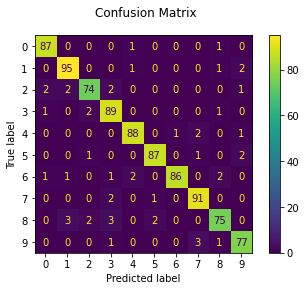

In [6]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
plt.show()